In [12]:
import os
import subprocess
from tqdm.notebook import tqdm

from split_kfolds import *
from centroid_subsample import *
from apply_labels import *
from build_plots import *

In [7]:
#======================================================#
# Load the taxonomy AnnData file, specify hierarchy of the taxonomy cell types, and specify a working directory where all the files would be ceated.
#======================================================#
h5ad_file = "/allen/programs/celltypes/workgroups/rnaseqanalysis/HMBA/Aim1_Atlases/BasalGanglia_paper_package/data/marmoset/Marmoset_HMBA_basalganglia_AIT_pre-print.h5ad"
hierarchy = ['Neighborhood', 'Class', 'Subclass', 'Group', 'Cluster']
working_dir = "./"

adata = ad.read_h5ad(h5ad_file)

In [8]:
#======================================================#
# Subsample the taxonomy to make a smaller subset using centroid subsampling method.
#======================================================#
subsampled_adata_filename = os.path.join(working_dir, "Marmoset_HMBA_basalganglia_AIT_subsampled.h5ad")
adata_subsample = run_cluster_centroid_subsampling(adata, subsampled_adata_filename, cluster_name="Group", latent_space="X_scVI", n=200) # or X_umap

Total number of Group level hierarchy: 56
Saving new subsampled h5ad file to: ./Marmoset_HMBA_basalganglia_AIT_subsampled.h5ad


In [10]:
#======================================================#
# Split the subsample taxonomy into k folds with 90/10 training/validation ratio and stratified by a hierarchy level.
#======================================================#
split_dataset(adata_subsample, stratify_by="Cluster", save_folds_dir=working_dir, n_folds=5, show_progress=True)

Creating folds:   0%|          | 0/5 [00:00<?, ?it/s]

Fold 1 writes:   0%|          | 0/2 [00:00<?, ?it/s]

Fold 2 writes:   0%|          | 0/2 [00:00<?, ?it/s]

Fold 3 writes:   0%|          | 0/2 [00:00<?, ?it/s]

Fold 4 writes:   0%|          | 0/2 [00:00<?, ?it/s]

Fold 5 writes:   0%|          | 0/2 [00:00<?, ?it/s]

In [16]:
#======================================================#
# Generate MapMyCells files with query genes and precomputed stats for each of the folds.
#======================================================#

env = dict(**os.environ, CUDA_VISIBLE_DEVICES="")  # disables GPU

for fold in tqdm(range(1, 6), desc="MapMyCells folds"): 
    subprocess.run(["./generate_MapMyCells_files.sh", str(fold), str(hierarchy), working_dir], 
                   check=True, env=env
                   )

MapMyCells folds:   0%|          | 0/5 [00:00<?, ?it/s]

FOLD: 1
HIERARCHY: ['Neighborhood', 'Class', 'Subclass', 'Group', 'Cluster']
WORKING_DIR: ./
finally process 3971048 tot 7.84e+00 reading 1.29e+00 writing 1.96e-01
writing folds/fold_1/reference_markers.h5
Starting precompute_stats.h5
744 of 47895 taxon pairs in 1.11e+00 sec; predict 7.02e+01 sec of 7.13e+01 sec left
1488 of 47895 taxon pairs in 1.62e+00 sec; predict 5.05e+01 sec of 5.22e+01 sec left
2232 of 47895 taxon pairs in 2.25e+00 sec; predict 4.61e+01 sec of 4.83e+01 sec left
2976 of 47895 taxon pairs in 2.86e+00 sec; predict 4.31e+01 sec of 4.60e+01 sec left
3720 of 47895 taxon pairs in 3.06e+00 sec; predict 3.64e+01 sec of 3.94e+01 sec left
4464 of 47895 taxon pairs in 3.12e+00 sec; predict 3.04e+01 sec of 3.35e+01 sec left
5208 of 47895 taxon pairs in 3.38e+00 sec; predict 2.77e+01 sec of 3.11e+01 sec left
5952 of 47895 taxon pairs in 3.51e+00 sec; predict 2.47e+01 sec of 2.82e+01 sec left
6696 of 47895 taxon pairs in 4.21e+00 sec; predict 2.59e+01 sec of 3.01e+01 sec left
7

/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Inkar/repositories/cell_type_mapper/src/cell_type_mapper/cli/cli_log.py:73: UserWarning: numpy's internal parallelization is enabled. This could cause independent worker processes to compete for resources, degrading performance. We recommend setting the following environment variables to '1' to improve performance
{
  "NUMEXPR_NUM_THREADS": "",
  "MKL_NUM_THREADS": "",
  "OMP_NUM_THREADS": ""
}
  warnings.warn(msg)
/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Inkar/repositories/cell_type_mapper/src/cell_type_mapper/taxonomy/utils.py:253: UserWarning: This taxonomy has no mapping from leaf_node -> rows in the cell by gene matrix
  warnings.warn("This taxonomy has no mapping from leaf_node -> rows "
/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Inkar/repositories/cell_type_mapper/src/cell_type_mapper/cli/cli_log.py:73: UserWarning: parent node 'Group/OPC' had too few markers in query set;

Running CPU implementation of type assignment.
BENCHMARK: spent 3.2136e+01 seconds assigning cell types
Writing marker genes to output file
MAPPING FROM SPECIFIED MARKERS RAN SUCCESSFULLY
CLEANING UP
=== Running Hierarchical Mapping 1.5.5 with config ===
{
  "max_gb": 100.0,
  "log_path": null,
  "precomputed_stats": {
    "log_level": "ERROR",
    "path": ".//folds/fold_1/precompute_stats.h5"
  },
  "verbose_stdout": true,
  "type_assignment": {
    "min_markers": 10,
    "normalization": "log2CPM",
    "chunk_size": 1000,
    "bootstrap_factor_lookup": null,
    "n_runners_up": 5,
    "bootstrap_iteration": 100,
    "bootstrap_factor": 0.5,
    "log_level": "ERROR",
    "n_processors": 16,
    "rng_seed": 11235813
  },
  "tmp_dir": null,
  "nodes_to_drop": null,
  "extended_result_path": ".//folds/fold_1/results_flat.json",
  "summary_metadata_path": null,
  "flatten": true,
  "csv_result_path": null,
  "extended_result_dir": null,
  "query_markers": {
    "serialized_lookup": ".//fo

/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Inkar/repositories/cell_type_mapper/src/cell_type_mapper/cli/cli_log.py:73: UserWarning: numpy's internal parallelization is enabled. This could cause independent worker processes to compete for resources, degrading performance. We recommend setting the following environment variables to '1' to improve performance
{
  "NUMEXPR_NUM_THREADS": "",
  "MKL_NUM_THREADS": "",
  "OMP_NUM_THREADS": ""
}
  warnings.warn(msg)
/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Inkar/repositories/cell_type_mapper/src/cell_type_mapper/taxonomy/utils.py:253: UserWarning: This taxonomy has no mapping from leaf_node -> rows in the cell by gene matrix
  warnings.warn("This taxonomy has no mapping from leaf_node -> rows "


Running CPU implementation of type assignment.
BENCHMARK: spent 1.4914e+01 seconds assigning cell types
Writing marker genes to output file
MAPPING FROM SPECIFIED MARKERS RAN SUCCESSFULLY
CLEANING UP
FOLD: 2
HIERARCHY: ['Neighborhood', 'Class', 'Subclass', 'Group', 'Cluster']
WORKING_DIR: ./
finally process 3973779 tot 7.43e+00 reading 1.11e+00 writing 1.53e-01
writing folds/fold_2/reference_markers.h5
Starting precompute_stats.h5
736 of 47586 taxon pairs in 1.65e+00 sec; predict 1.05e+02 sec of 1.06e+02 sec left
1472 of 47586 taxon pairs in 2.11e+00 sec; predict 6.62e+01 sec of 6.83e+01 sec left
2208 of 47586 taxon pairs in 2.48e+00 sec; predict 5.09e+01 sec of 5.34e+01 sec left
2944 of 47586 taxon pairs in 2.68e+00 sec; predict 4.07e+01 sec of 4.34e+01 sec left
3680 of 47586 taxon pairs in 2.79e+00 sec; predict 3.32e+01 sec of 3.60e+01 sec left
4416 of 47586 taxon pairs in 2.85e+00 sec; predict 2.79e+01 sec of 3.07e+01 sec left
5152 of 47586 taxon pairs in 3.63e+00 sec; predict 2.99e

/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Inkar/repositories/cell_type_mapper/src/cell_type_mapper/cli/cli_log.py:73: UserWarning: numpy's internal parallelization is enabled. This could cause independent worker processes to compete for resources, degrading performance. We recommend setting the following environment variables to '1' to improve performance
{
  "NUMEXPR_NUM_THREADS": "",
  "MKL_NUM_THREADS": "",
  "OMP_NUM_THREADS": ""
}
  warnings.warn(msg)
/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Inkar/repositories/cell_type_mapper/src/cell_type_mapper/taxonomy/utils.py:253: UserWarning: This taxonomy has no mapping from leaf_node -> rows in the cell by gene matrix
  warnings.warn("This taxonomy has no mapping from leaf_node -> rows "
/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Inkar/repositories/cell_type_mapper/src/cell_type_mapper/cli/cli_log.py:73: UserWarning: parent node 'Group/Oligo OPALIN' had too few markers in q

Running CPU implementation of type assignment.
BENCHMARK: spent 3.0518e+01 seconds assigning cell types
Writing marker genes to output file
MAPPING FROM SPECIFIED MARKERS RAN SUCCESSFULLY
CLEANING UP
=== Running Hierarchical Mapping 1.5.5 with config ===
{
  "obsm_key": null,
  "cloud_safe": false,
  "csv_result_path": null,
  "flatten": true,
  "tmp_dir": null,
  "extended_result_dir": null,
  "log_path": null,
  "log_level": "ERROR",
  "precomputed_stats": {
    "log_level": "ERROR",
    "path": ".//folds/fold_2/precompute_stats.h5"
  },
  "max_gb": 100.0,
  "extended_result_path": ".//folds/fold_2/results_flat.json",
  "hdf5_result_path": null,
  "query_path": ".//folds/fold_2/validation.h5ad",
  "summary_metadata_path": null,
  "map_to_ensembl": false,
  "type_assignment": {
    "n_processors": 16,
    "min_markers": 10,
    "bootstrap_factor_lookup": null,
    "bootstrap_iteration": 100,
    "rng_seed": 11235813,
    "normalization": "log2CPM",
    "n_runners_up": 5,
    "bootstra

/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Inkar/repositories/cell_type_mapper/src/cell_type_mapper/cli/cli_log.py:73: UserWarning: numpy's internal parallelization is enabled. This could cause independent worker processes to compete for resources, degrading performance. We recommend setting the following environment variables to '1' to improve performance
{
  "NUMEXPR_NUM_THREADS": "",
  "MKL_NUM_THREADS": "",
  "OMP_NUM_THREADS": ""
}
  warnings.warn(msg)
/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Inkar/repositories/cell_type_mapper/src/cell_type_mapper/taxonomy/utils.py:253: UserWarning: This taxonomy has no mapping from leaf_node -> rows in the cell by gene matrix
  warnings.warn("This taxonomy has no mapping from leaf_node -> rows "


Running CPU implementation of type assignment.
BENCHMARK: spent 1.6268e+01 seconds assigning cell types
Writing marker genes to output file
MAPPING FROM SPECIFIED MARKERS RAN SUCCESSFULLY
CLEANING UP
FOLD: 3
HIERARCHY: ['Neighborhood', 'Class', 'Subclass', 'Group', 'Cluster']
WORKING_DIR: ./
finally process 3976324 tot 7.23e+00 reading 1.18e+00 writing 1.38e-01
writing folds/fold_3/reference_markers.h5
Starting precompute_stats.h5
736 of 47278 taxon pairs in 1.28e+00 sec; predict 8.11e+01 sec of 8.24e+01 sec left
1472 of 47278 taxon pairs in 2.13e+00 sec; predict 6.63e+01 sec of 6.84e+01 sec left
2208 of 47278 taxon pairs in 2.16e+00 sec; predict 4.42e+01 sec of 4.63e+01 sec left
2944 of 47278 taxon pairs in 2.19e+00 sec; predict 3.30e+01 sec of 3.52e+01 sec left
3680 of 47278 taxon pairs in 2.28e+00 sec; predict 2.70e+01 sec of 2.92e+01 sec left
4416 of 47278 taxon pairs in 3.40e+00 sec; predict 3.30e+01 sec of 3.64e+01 sec left
5152 of 47278 taxon pairs in 3.41e+00 sec; predict 2.79e

/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Inkar/repositories/cell_type_mapper/src/cell_type_mapper/cli/cli_log.py:73: UserWarning: numpy's internal parallelization is enabled. This could cause independent worker processes to compete for resources, degrading performance. We recommend setting the following environment variables to '1' to improve performance
{
  "NUMEXPR_NUM_THREADS": "",
  "MKL_NUM_THREADS": "",
  "OMP_NUM_THREADS": ""
}
  warnings.warn(msg)
/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Inkar/repositories/cell_type_mapper/src/cell_type_mapper/taxonomy/utils.py:253: UserWarning: This taxonomy has no mapping from leaf_node -> rows in the cell by gene matrix
  warnings.warn("This taxonomy has no mapping from leaf_node -> rows "
/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Inkar/repositories/cell_type_mapper/src/cell_type_mapper/cli/cli_log.py:73: UserWarning: 'Group/STR TAC3-PLPP4 GABA' has no valid markers in marke

Running CPU implementation of type assignment.
BENCHMARK: spent 3.0033e+01 seconds assigning cell types
Writing marker genes to output file
MAPPING FROM SPECIFIED MARKERS RAN SUCCESSFULLY
CLEANING UP
=== Running Hierarchical Mapping 1.5.5 with config ===
{
  "query_path": ".//folds/fold_3/validation.h5ad",
  "summary_metadata_path": null,
  "verbose_stdout": true,
  "tmp_dir": null,
  "obsm_clobber": false,
  "flatten": true,
  "map_to_ensembl": false,
  "log_level": "ERROR",
  "type_assignment": {
    "rng_seed": 11235813,
    "n_processors": 16,
    "min_markers": 10,
    "bootstrap_factor_lookup": null,
    "n_runners_up": 5,
    "bootstrap_iteration": 100,
    "bootstrap_factor": 0.5,
    "normalization": "log2CPM",
    "log_level": "ERROR",
    "chunk_size": 1000
  },
  "obsm_key": null,
  "hdf5_result_path": null,
  "drop_level": null,
  "log_path": null,
  "max_gb": 100.0,
  "precomputed_stats": {
    "log_level": "ERROR",
    "path": ".//folds/fold_3/precompute_stats.h5"
  },
 

/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Inkar/repositories/cell_type_mapper/src/cell_type_mapper/cli/cli_log.py:73: UserWarning: numpy's internal parallelization is enabled. This could cause independent worker processes to compete for resources, degrading performance. We recommend setting the following environment variables to '1' to improve performance
{
  "NUMEXPR_NUM_THREADS": "",
  "MKL_NUM_THREADS": "",
  "OMP_NUM_THREADS": ""
}
  warnings.warn(msg)
/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Inkar/repositories/cell_type_mapper/src/cell_type_mapper/taxonomy/utils.py:253: UserWarning: This taxonomy has no mapping from leaf_node -> rows in the cell by gene matrix
  warnings.warn("This taxonomy has no mapping from leaf_node -> rows "


Running CPU implementation of type assignment.
BENCHMARK: spent 1.4862e+01 seconds assigning cell types
Writing marker genes to output file
MAPPING FROM SPECIFIED MARKERS RAN SUCCESSFULLY
CLEANING UP
FOLD: 4
HIERARCHY: ['Neighborhood', 'Class', 'Subclass', 'Group', 'Cluster']
WORKING_DIR: ./
finally process 3978868 tot 7.49e+00 reading 1.15e+00 writing 1.46e-01
writing folds/fold_4/reference_markers.h5
Starting precompute_stats.h5
704 of 45451 taxon pairs in 5.73e-01 sec; predict 3.64e+01 sec of 3.70e+01 sec left
1408 of 45451 taxon pairs in 8.30e-01 sec; predict 2.60e+01 sec of 2.68e+01 sec left
2112 of 45451 taxon pairs in 9.88e-01 sec; predict 2.03e+01 sec of 2.13e+01 sec left
2816 of 45451 taxon pairs in 2.25e+00 sec; predict 3.41e+01 sec of 3.64e+01 sec left
3520 of 45451 taxon pairs in 2.28e+00 sec; predict 2.72e+01 sec of 2.94e+01 sec left
4224 of 45451 taxon pairs in 2.75e+00 sec; predict 2.68e+01 sec of 2.96e+01 sec left
4928 of 45451 taxon pairs in 2.88e+00 sec; predict 2.37e

/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Inkar/repositories/cell_type_mapper/src/cell_type_mapper/cli/cli_log.py:73: UserWarning: numpy's internal parallelization is enabled. This could cause independent worker processes to compete for resources, degrading performance. We recommend setting the following environment variables to '1' to improve performance
{
  "NUMEXPR_NUM_THREADS": "",
  "MKL_NUM_THREADS": "",
  "OMP_NUM_THREADS": ""
}
  warnings.warn(msg)
/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Inkar/repositories/cell_type_mapper/src/cell_type_mapper/taxonomy/utils.py:253: UserWarning: This taxonomy has no mapping from leaf_node -> rows in the cell by gene matrix
  warnings.warn("This taxonomy has no mapping from leaf_node -> rows "
/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Inkar/repositories/cell_type_mapper/src/cell_type_mapper/cli/cli_log.py:73: UserWarning: 'Group/STRd D2 Striosome MSN' has no valid markers in mar

Running CPU implementation of type assignment.
BENCHMARK: spent 2.9091e+01 seconds assigning cell types
Writing marker genes to output file
MAPPING FROM SPECIFIED MARKERS RAN SUCCESSFULLY
CLEANING UP
=== Running Hierarchical Mapping 1.5.5 with config ===
{
  "query_markers": {
    "collapse_markers": false,
    "serialized_lookup": ".//folds/fold_4/query_markers.json",
    "log_level": "ERROR"
  },
  "drop_level": null,
  "nodes_to_drop": null,
  "type_assignment": {
    "min_markers": 10,
    "n_runners_up": 5,
    "bootstrap_factor": 0.5,
    "bootstrap_iteration": 100,
    "normalization": "log2CPM",
    "bootstrap_factor_lookup": null,
    "log_level": "ERROR",
    "chunk_size": 1000,
    "n_processors": 16,
    "rng_seed": 11235813
  },
  "verbose_stdout": true,
  "log_level": "ERROR",
  "extended_result_path": ".//folds/fold_4/results_flat.json",
  "extended_result_dir": null,
  "max_gb": 100.0,
  "tmp_dir": null,
  "flatten": true,
  "verbose_csv": false,
  "obsm_clobber": false

/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Inkar/repositories/cell_type_mapper/src/cell_type_mapper/cli/cli_log.py:73: UserWarning: numpy's internal parallelization is enabled. This could cause independent worker processes to compete for resources, degrading performance. We recommend setting the following environment variables to '1' to improve performance
{
  "NUMEXPR_NUM_THREADS": "",
  "MKL_NUM_THREADS": "",
  "OMP_NUM_THREADS": ""
}
  warnings.warn(msg)
/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Inkar/repositories/cell_type_mapper/src/cell_type_mapper/taxonomy/utils.py:253: UserWarning: This taxonomy has no mapping from leaf_node -> rows in the cell by gene matrix
  warnings.warn("This taxonomy has no mapping from leaf_node -> rows "


Running CPU implementation of type assignment.
BENCHMARK: spent 1.5501e+01 seconds assigning cell types
Writing marker genes to output file
MAPPING FROM SPECIFIED MARKERS RAN SUCCESSFULLY
CLEANING UP
FOLD: 5
HIERARCHY: ['Neighborhood', 'Class', 'Subclass', 'Group', 'Cluster']
WORKING_DIR: ./
finally process 3981502 tot 7.52e+00 reading 1.18e+00 writing 1.52e-01
writing folds/fold_5/reference_markers.h5
Starting precompute_stats.h5
696 of 44850 taxon pairs in 3.66e-02 min; predict 2.32e+00 min of 2.36e+00 min left
1392 of 44850 taxon pairs in 2.27e+00 sec; predict 7.07e+01 sec of 7.30e+01 sec left
2088 of 44850 taxon pairs in 2.44e+00 sec; predict 4.99e+01 sec of 5.23e+01 sec left
2784 of 44850 taxon pairs in 2.48e+00 sec; predict 3.75e+01 sec of 3.99e+01 sec left
3480 of 44850 taxon pairs in 2.67e+00 sec; predict 3.17e+01 sec of 3.44e+01 sec left
4176 of 44850 taxon pairs in 2.97e+00 sec; predict 2.90e+01 sec of 3.19e+01 sec left
4872 of 44850 taxon pairs in 3.16e+00 sec; predict 2.59e

/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Inkar/repositories/cell_type_mapper/src/cell_type_mapper/cli/cli_log.py:73: UserWarning: numpy's internal parallelization is enabled. This could cause independent worker processes to compete for resources, degrading performance. We recommend setting the following environment variables to '1' to improve performance
{
  "NUMEXPR_NUM_THREADS": "",
  "MKL_NUM_THREADS": "",
  "OMP_NUM_THREADS": ""
}
  warnings.warn(msg)
/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Inkar/repositories/cell_type_mapper/src/cell_type_mapper/taxonomy/utils.py:253: UserWarning: This taxonomy has no mapping from leaf_node -> rows in the cell by gene matrix
  warnings.warn("This taxonomy has no mapping from leaf_node -> rows "
/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Inkar/repositories/cell_type_mapper/src/cell_type_mapper/cli/cli_log.py:73: UserWarning: 'Group/STRd D2 Striosome MSN' has no valid markers in mar

Running CPU implementation of type assignment.
BENCHMARK: spent 3.0018e+01 seconds assigning cell types
Writing marker genes to output file
MAPPING FROM SPECIFIED MARKERS RAN SUCCESSFULLY
CLEANING UP
=== Running Hierarchical Mapping 1.5.5 with config ===
{
  "max_gb": 100.0,
  "query_path": ".//folds/fold_5/validation.h5ad",
  "log_level": "ERROR",
  "csv_result_path": null,
  "precomputed_stats": {
    "log_level": "ERROR",
    "path": ".//folds/fold_5/precompute_stats.h5"
  },
  "tmp_dir": null,
  "flatten": true,
  "obsm_clobber": false,
  "nodes_to_drop": null,
  "hdf5_result_path": null,
  "obsm_key": null,
  "log_path": null,
  "cloud_safe": false,
  "verbose_stdout": true,
  "query_markers": {
    "log_level": "ERROR",
    "collapse_markers": false,
    "serialized_lookup": ".//folds/fold_5/query_markers.json"
  },
  "drop_level": null,
  "extended_result_path": ".//folds/fold_5/results_flat.json",
  "extended_result_dir": null,
  "map_to_ensembl": false,
  "verbose_csv": false,

/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Inkar/repositories/cell_type_mapper/src/cell_type_mapper/cli/cli_log.py:73: UserWarning: numpy's internal parallelization is enabled. This could cause independent worker processes to compete for resources, degrading performance. We recommend setting the following environment variables to '1' to improve performance
{
  "NUMEXPR_NUM_THREADS": "",
  "MKL_NUM_THREADS": "",
  "OMP_NUM_THREADS": ""
}
  warnings.warn(msg)
/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/Team/Inkar/repositories/cell_type_mapper/src/cell_type_mapper/taxonomy/utils.py:253: UserWarning: This taxonomy has no mapping from leaf_node -> rows in the cell by gene matrix
  warnings.warn("This taxonomy has no mapping from leaf_node -> rows "


Running CPU implementation of type assignment.
BENCHMARK: spent 1.5368e+01 seconds assigning cell types
Writing marker genes to output file
MAPPING FROM SPECIFIED MARKERS RAN SUCCESSFULLY
CLEANING UP


In [19]:
#======================================================#
# Combine the predicted and true labels for each of the folds into one csv file.
#======================================================#

combine_predicted_labels(working_dir, adata_subsample, hierarchy, hierarchy, n_folds=5, ref_dataset_name="Marmoset", mapping_method="Hierarchical", apply_tax_tree_label_names = False)
combine_predicted_labels(working_dir, adata_subsample, hierarchy, hierarchy, n_folds=5, ref_dataset_name="Marmoset", mapping_method="Flat", apply_tax_tree_label_names = False)

Reading fold 1: ./folds/fold_1/results_hann.json
All IDs match.
Reading fold 2: ./folds/fold_2/results_hann.json
All IDs match.
Reading fold 3: ./folds/fold_3/results_hann.json
All IDs match.
Reading fold 4: ./folds/fold_4/results_hann.json
All IDs match.
Reading fold 5: ./folds/fold_5/results_hann.json
All IDs match.
Saved combined predictions for all hierarchies to ./results/Hierarchical/Hierarchical_predictions.csv
Finished processing all folds.
Reading fold 1: ./folds/fold_1/results_flat.json
All IDs match.
Reading fold 2: ./folds/fold_2/results_flat.json
All IDs match.
Reading fold 3: ./folds/fold_3/results_flat.json
All IDs match.
Reading fold 4: ./folds/fold_4/results_flat.json
All IDs match.
Reading fold 5: ./folds/fold_5/results_flat.json
All IDs match.
Saved combined predictions for all hierarchies to ./results/Flat/Flat_predictions.csv
Finished processing all folds.


In [20]:
#======================================================#
# Using the combined mapping results files, build plots to show F1 scores, confidence values, and cell type heatmaps.
#======================================================#
build_benchmarks(working_dir, hierarchy, ref_dataset_name="Marmoset", mapping_method="Hierarchical", save_pdf=True)
build_benchmarks(working_dir, hierarchy, ref_dataset_name="Marmoset", mapping_method="Flat", save_pdf=True)


=========== Building Plots ===========
Processing hierarchy level Neighborhood and method Hierarchical.
writing to file hierarchical_Neighborhood, f1 0.9926305522294997, rec 0.9881642996375317, prec 0.997198938312606. 

Saving plots to PNG and/or PDF
Processing hierarchy level Class and method Hierarchical.
writing to file hierarchical_Class, f1 0.9953357632820438, rec 0.9933691107019528, prec 0.9973891496575099. 

Saving plots to PNG and/or PDF
Processing hierarchy level Subclass and method Hierarchical.
writing to file hierarchical_Subclass, f1 0.9942766010045441, rec 0.9922563058062055, prec 0.9965894620478887. 

Saving plots to PNG and/or PDF
Processing hierarchy level Group and method Hierarchical.
writing to file hierarchical_Group, f1 0.990965674567108, rec 0.9902876128252858, prec 0.9919572062596774. 

Saving plots to PNG and/or PDF
Processing hierarchy level Cluster and method Hierarchical.
writing to file hierarchical_Cluster, f1 0.3423876150496279, rec 0.3580321057649401, pr

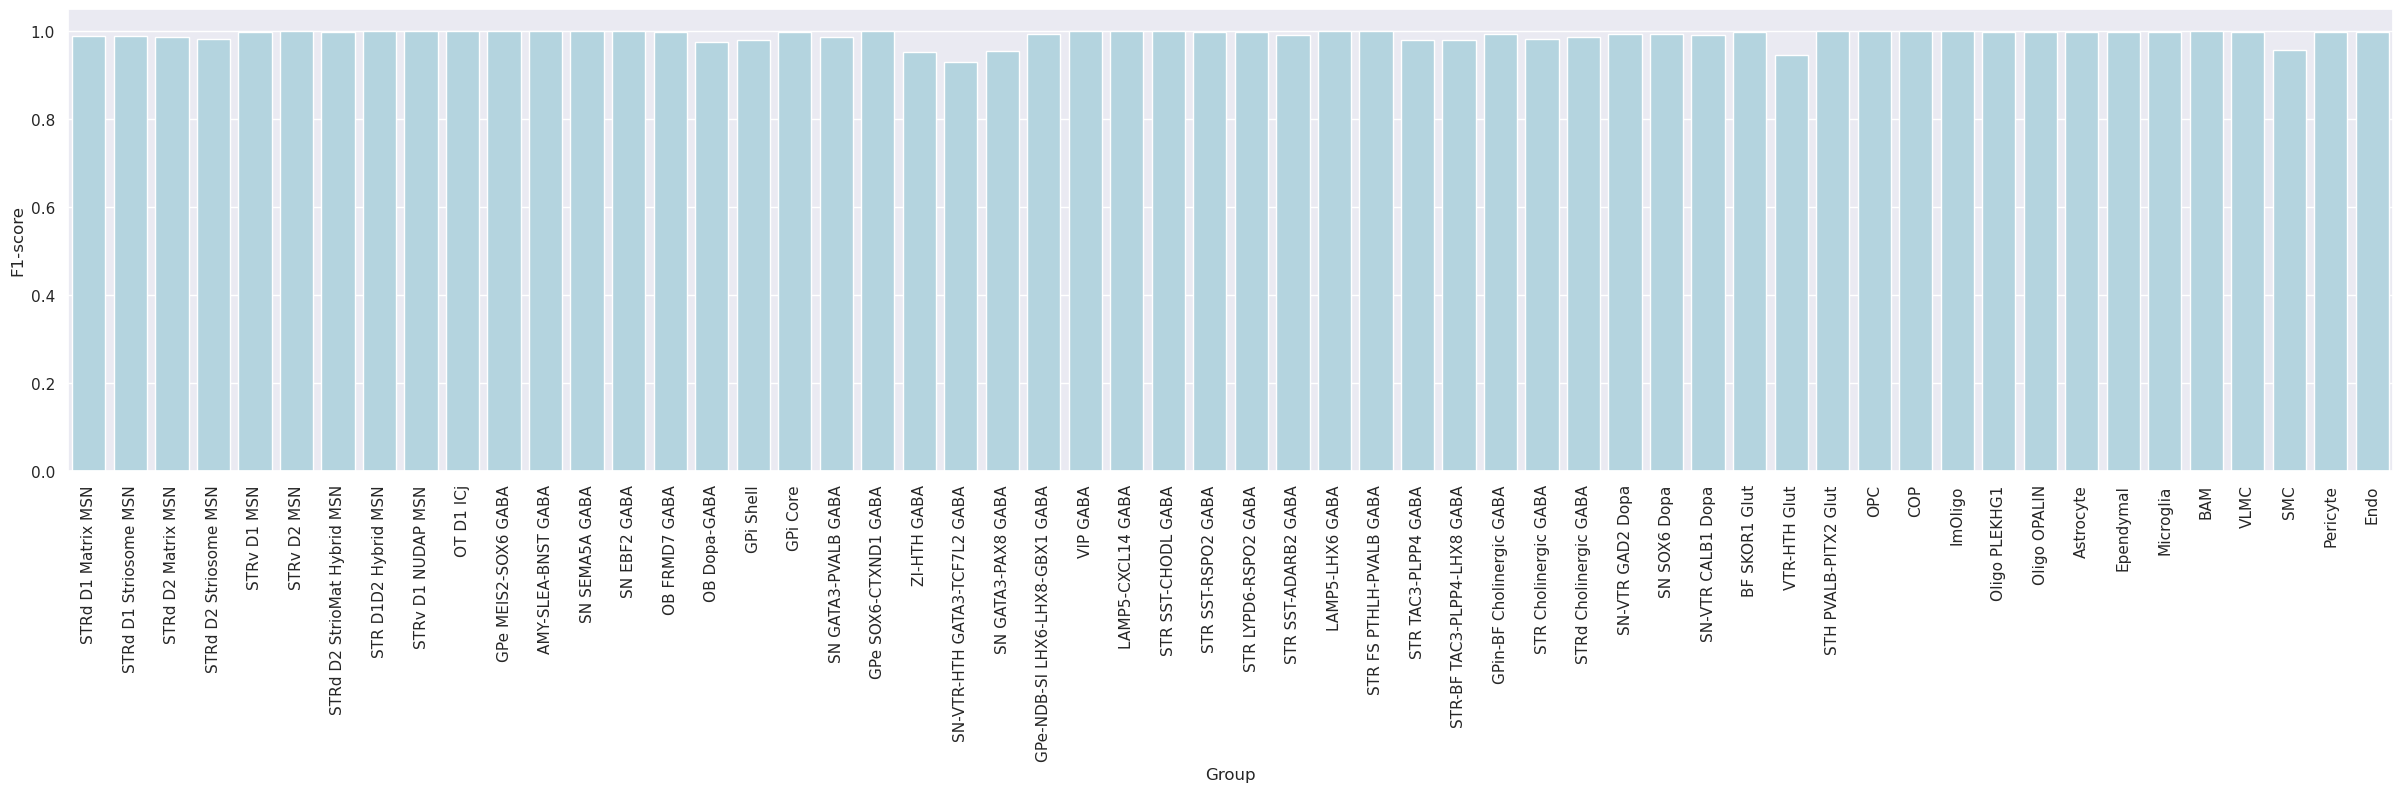

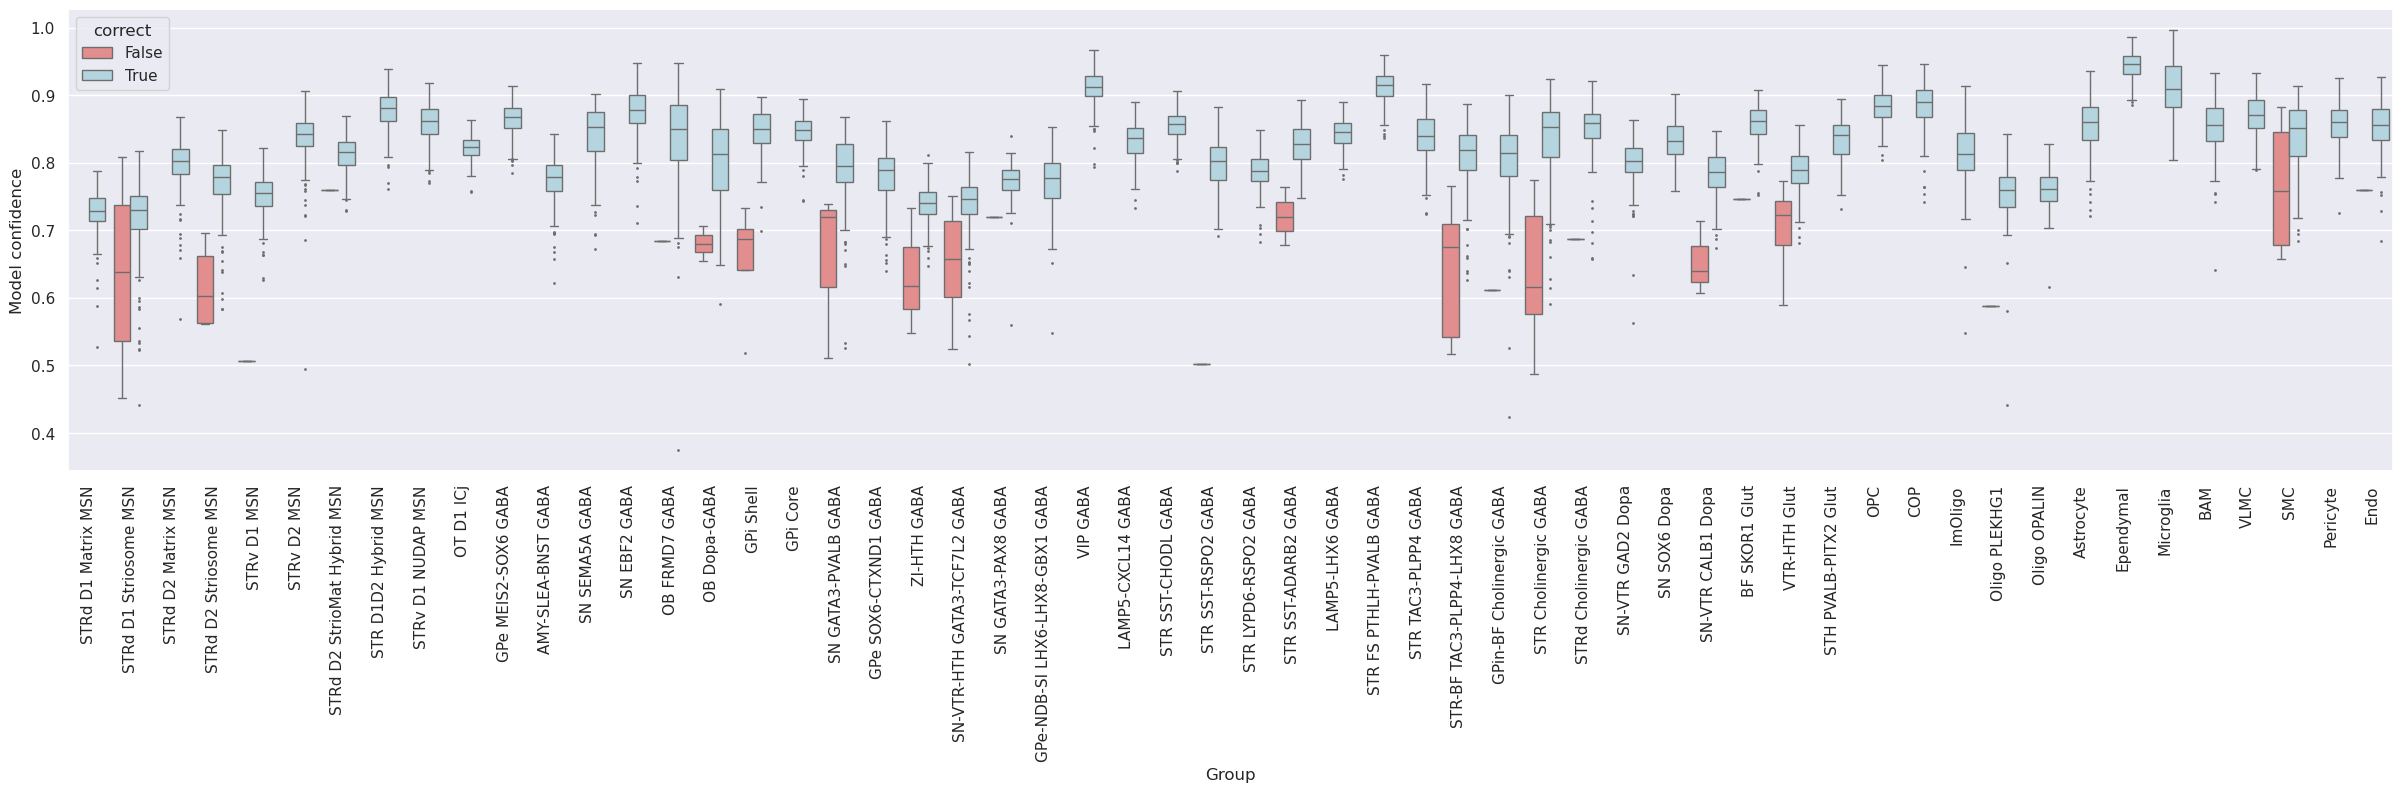

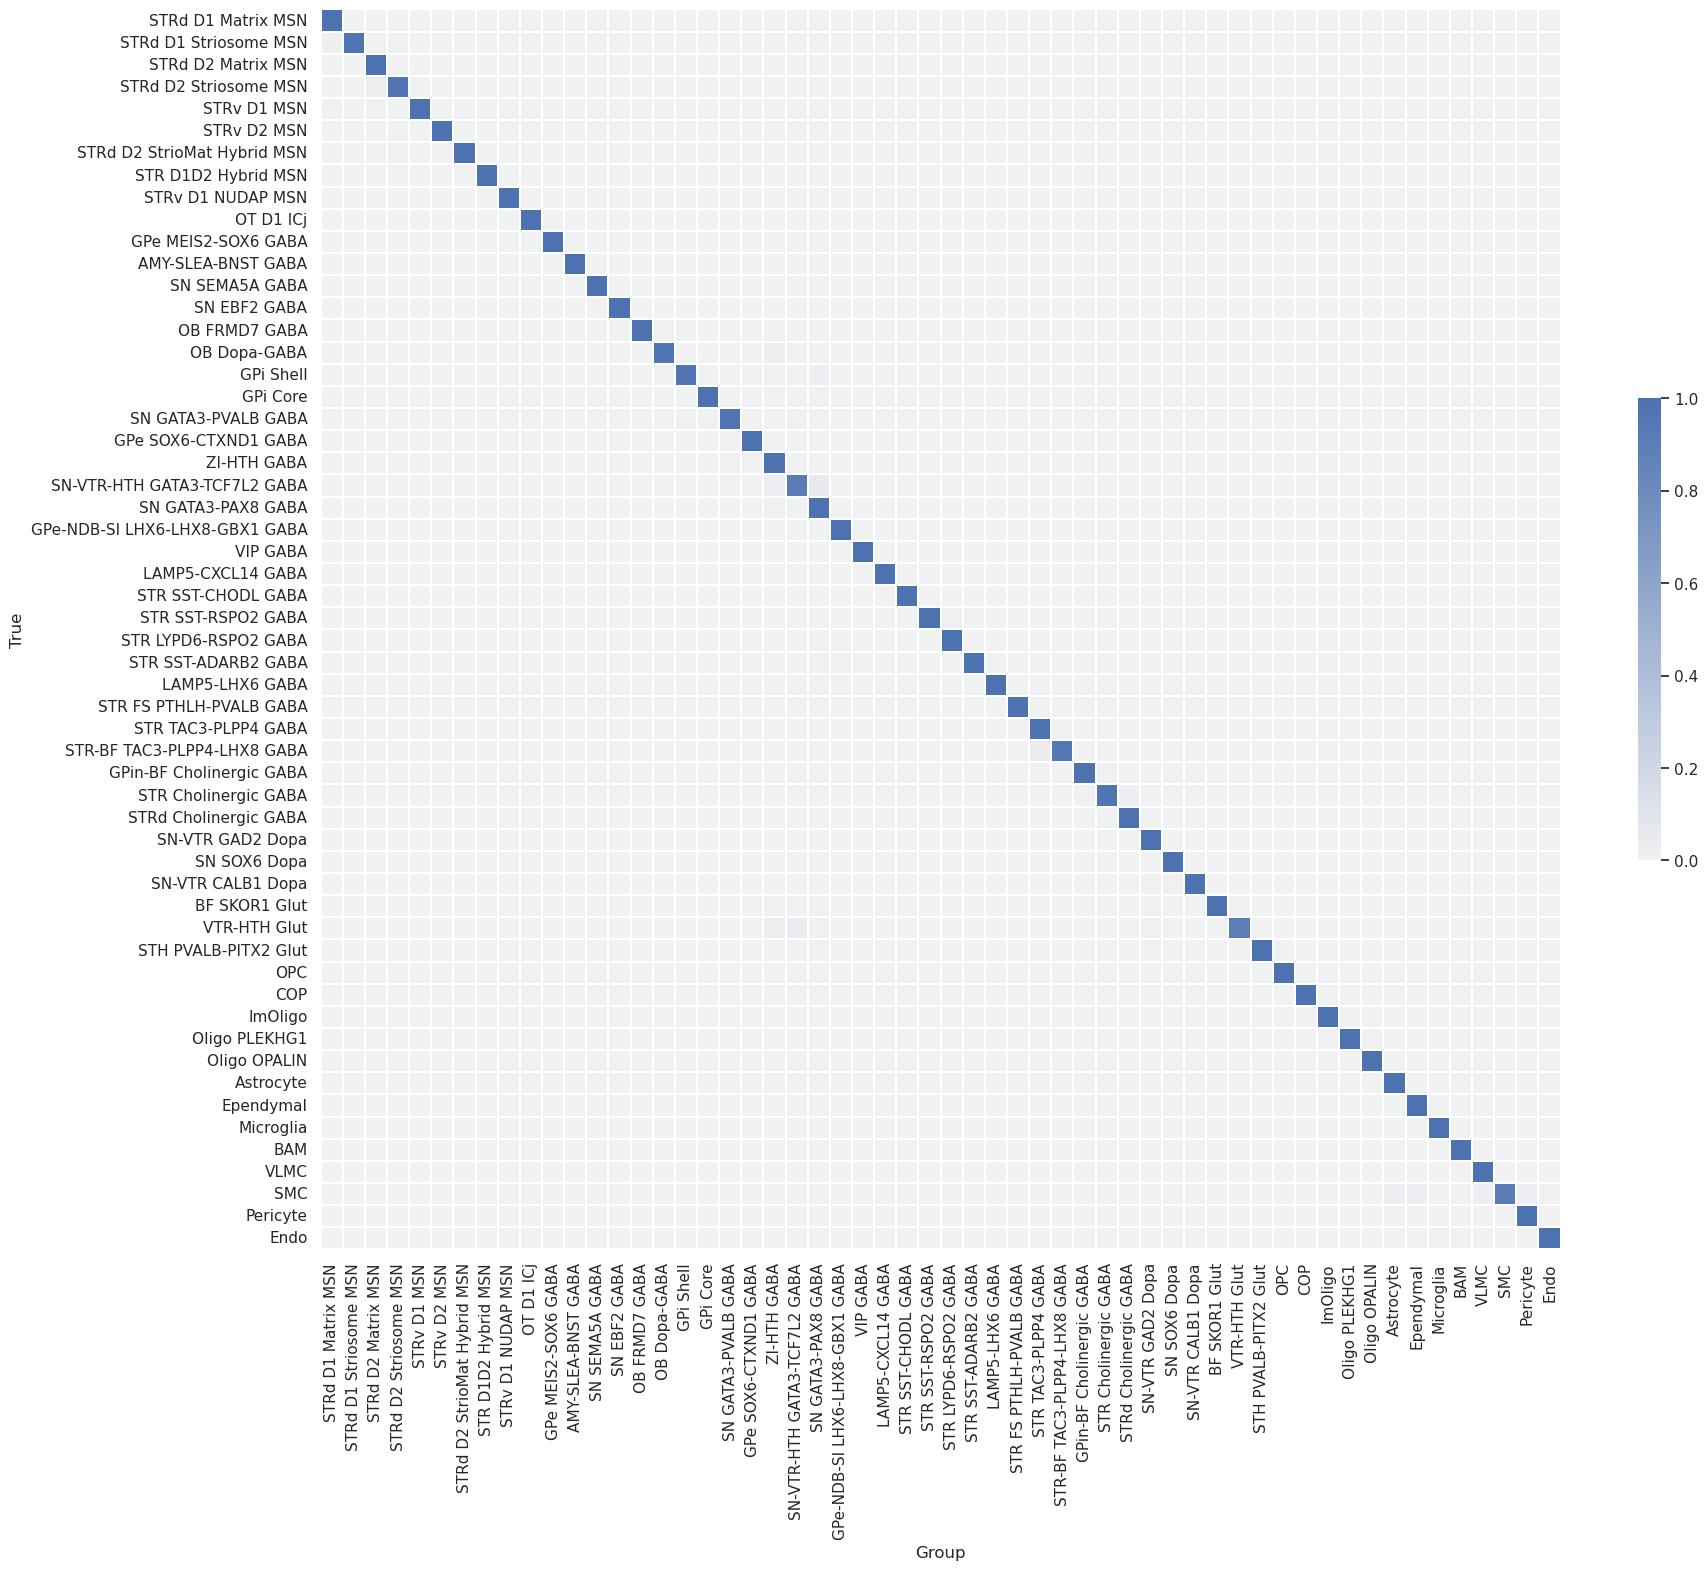

In [21]:
#======================================================#
# Display some of the generated plots. 
#======================================================#

from IPython.display import Image, display

# Display generated plots for Group Level
display(Image(filename=os.path.join(working_dir,"results/Hierarchical/plots/hierarchical_Group_figure_1.png")))
display(Image(filename=os.path.join(working_dir,"results/Hierarchical/plots/hierarchical_Group_figure_2.png")))
display(Image(filename=os.path.join(working_dir,"results/Hierarchical/plots/hierarchical_Group_figure_3.png")))